# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Zomer

Student name: Nicola 
    
ID: 2058479

In [1]:
kuzushiji_symbols = ['お', 'き', 'す', 'つ', 'な', 'は', 'ま', 'や', 'れ', 'を']

In [2]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0.1


In [3]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [4]:
ID = 2058479
np.random.seed(ID)

In [5]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
print("Number of features:", X.shape[1])
# rescale the data - original pixel values are between 0 and 255
X = X / 255.0

# 60000 samples, each featuring 784 pixels

Number of samples in the K-MNIST dataset: 60000
Number of features: 784


Now split into training and test. We start with a small **training set of 600 samples** to reduce computation time while **4000 samples will be used for testing**. Make sure that each label is present at least 10 times in train and test set frequencies.

In [6]:
# FUNCTION FOR CHECKING IF EACH UNIQUE LABEL APPEARS IN THE ARRAY A MINIMUM NUMBER OF TIMES

def check_minimum_labels(Y, minimum):
    # Y has to be a np array
    labels = np.unique(Y)
    for label in labels:
        if np.sum(Y==label) < minimum:
            return False
    return True   

In [7]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

while not check_minimum_labels(y_train, 10) or not check_minimum_labels(y_test, 10):
    permutation = np.random.permutation(X.shape[0]) # again random permutation
    
    X = X[permutation]
    y = y[permutation]
    
    X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
    y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("\nLabels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 47 58 73 67 59 59 66 56 54]

Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [400 387 394 429 408 437 390 367 406 382]


In [8]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i, %s"%(labels[index], kuzushiji_symbols[labels[index]]))
    return

INPUT:


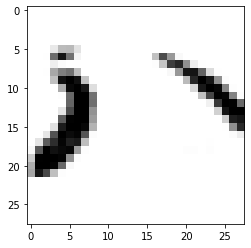

LABEL: 5, は
INPUT:


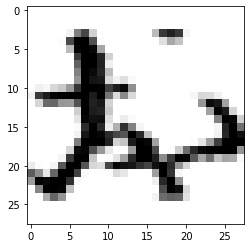

LABEL: 0, お
INPUT:


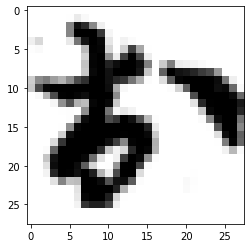

LABEL: 0, お


In [9]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1 (done)

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function (_ReLU_), pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.

Useful URLs:
- [1.17. Neural network models (supervised) — scikit-learn 1.0.1 documentation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
- [sklearn.neural_network.MLPClassifier — scikit-learn 1.0.1 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)


**TODO:** study how the multi-layer perceptron classifier works (what do the parameters mean?) 

In [10]:

# TODO: these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10)]}

# hidden_layer_sizes: length = n_layers - 2, default=(100,)
# The ith element represents the number of neurons in the ith hidden layer.

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

mlp_clf_hl = GridSearchCV(mlp, param_grid = parameters, cv=5)
mlp_clf_hl.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
best_NNarchitecture = mlp_clf_hl.best_params_['hidden_layer_sizes']
print('hidden_layer_sizes:', best_NNarchitecture)

print("\nScore with best parameters:")
print(mlp_clf_hl.best_score_)

print("\nAll scores on the grid (hidden_layer_sizes):")
mean_scores = mlp_clf_hl.cv_results_['mean_test_score']

df = pd.DataFrame({'hidden layer sizes': parameters['hidden_layer_sizes'], 'mean score': mean_scores})
df.style.highlight_max(subset='mean score', props='color:lightgray; font-weight:bold; background-color:darkblue;')


C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
hidden_layer_sizes: (40,)

Score with best parameters:
0.7483333333333333

All scores on the grid (hidden_layer_sizes):


,hidden layer sizes,mean score
0,"(10,)",0.653333
1,"(20,)",0.721667
2,"(40,)",0.748333
3,"(20, 20)",0.726667
4,"(40, 20, 10)",0.686667


### TO DO 2 (done)

Now try also different batch sizes, **while keeping the best NN architecture you have found above**. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

From MLPClassifier docu: 
> batch_size: int, default=’auto’ <br>
> Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples).

In [11]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# TODO: again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

# ? should I do this also above and below? And should I done it also in the previous lab? What is the difference?
# recall to use cv=kf to use the k-fold subdivision seen in the lectures

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes=best_NNarchitecture)

mlp_clf_batch = GridSearchCV(mlp, param_grid=parameters, cv = kf)
mlp_clf_batch.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')
print("Best parameters set found:")
best_batchsize = mlp_clf_batch.best_params_['batch_size']
print('- hidden_layer_sizes:', best_NNarchitecture)
print('- batch_size:', best_batchsize)

print("\nScore with best parameters:")
print(mlp_clf_batch.best_score_)

print("\nAll scores on the grid (batch_size):")
mean_scores = mlp_clf_batch.cv_results_['mean_test_score']

df = pd.DataFrame({'batch size': parameters['batch_size'], 'mean score': mean_scores})
df.style.highlight_max(subset='mean score', props='color:lightgray; font-weight:bold; background-color:darkblue;')

C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicola\miniconda3\lib\site-packages\sklearn\neural_netw


RESULTS FOR NN

Best parameters set found:
- hidden_layer_sizes: (40,)
- batch_size: 32

Score with best parameters:
0.7533333333333332

All scores on the grid (batch_size):


,batch size,mean score
0,1,0.110000
1,32,0.753333
2,480,0.746667


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

#### [ANSWER TO QUESTION 1]

### TODO 3 (done)

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.76 sec

Training MLP of size (20,) ...
Done, training time: 0.70 sec

Training MLP of size (40,) ...
Done, training time: 0.82 sec

Training MLP of size (20, 20) ...
Done, training time: 0.56 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.55 sec



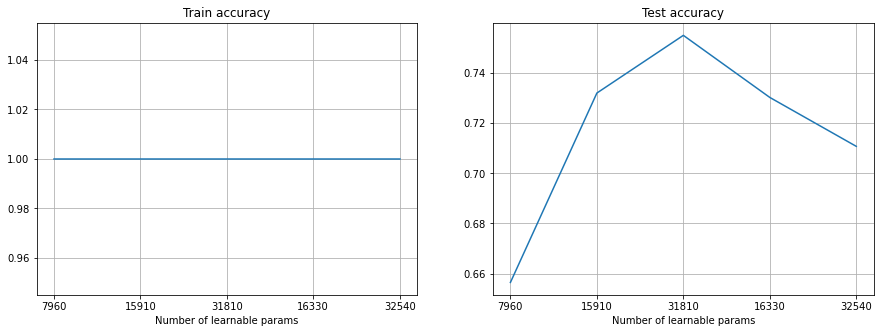

In [12]:
import time
import warnings
from sklearn.exceptions import ConvergenceWarning
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp_hlplot = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes=hl_size)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn") 
        mlp_hlplot.fit(X_train, y_train)
        
    train_acc_list.append(mlp_hlplot.score(X_train, y_train))
    test_acc_list.append(mlp_hlplot.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

#### [ANSWER TO QUESTION 2]

## TO DO 4 (done)

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 


RESULTS FOR NN

Best parameters set found:
- hidden_layer_sizes: (40,)
- batch_size: 32
- learning_rate_init: 0.02

Score with best parameters:
0.7533333333333334

All scores on the grid (learning_rate_init):


,learning rate,mean score
0,0.000200,0.685000
1,0.002000,0.730000
2,0.020000,0.753333
3,0.200000,0.676667


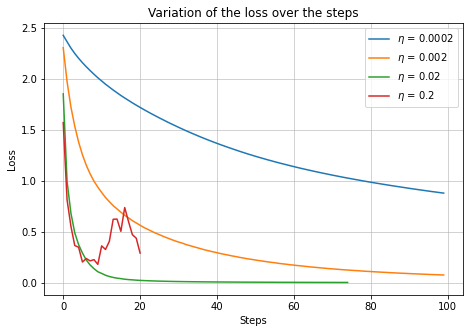

In [13]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}
parameters = {'learning_rate_init': lr_list}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_NNarchitecture, 
                    batch_size=best_batchsize)

mlp_clf_lr = GridSearchCV(mlp, param_grid=parameters, cv=5)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp_clf_lr.fit(X_train, y_train)


# PLOT -------------------------------------------------------------------------------------------------
# ? is it correct to train 2 times the models in this way to make the plots

plt.figure(figsize=(7.5, 5))

for lr in lr_list: 
    mlp_lr = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr, 
                    hidden_layer_sizes=best_NNarchitecture, 
                    batch_size=best_batchsize)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        mlp_lr.fit(X_train, y_train)
        
    plt.plot(mlp_lr.loss_curve_, label = r'$\eta$ = '+str(lr))
    # "loss_curve_": the ith element in the list represents the loss at the ith iteration

plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Variation of the loss over the steps')
plt.grid(alpha=0.7)
plt.legend()

# ------------------------------------------------------------------------------------------------------

print ('\nRESULTS FOR NN\n')
print("Best parameters set found:")
best_lr = mlp_clf_lr.best_params_['learning_rate_init']
print('- hidden_layer_sizes:', best_NNarchitecture)
print('- batch_size:', best_batchsize)
print('- learning_rate_init:', best_lr)

print("\nScore with best parameters:")
print(mlp_clf_lr.best_score_)

print("\nAll scores on the grid (learning_rate_init):")
mean_scores = mlp_clf_lr.cv_results_['mean_test_score']

df = pd.DataFrame({'learning rate': lr_list, 'mean score': mean_scores})
df.style.highlight_max(subset='mean score', props='color:lightgray; font-weight:bold; background-color:darkblue;')


## QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

### [ANSWER TO QUESTION 3]

## TO DO 5 (done)

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.245250


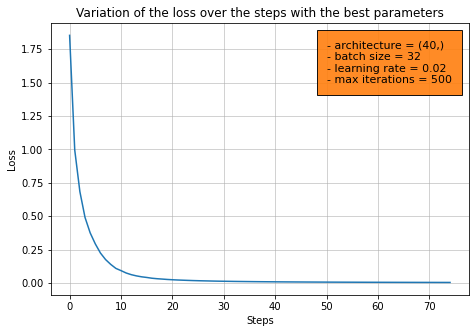

In [14]:
#get training and test error for the best NN model from CV
mlp_best = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=best_lr, 
                    hidden_layer_sizes=best_NNarchitecture, 
                    batch_size=best_batchsize)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp_best.fit(X_train, y_train)
    
training_error = 1 - mlp_best.score(X_train, y_train)
test_error = 1 - mlp_best.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

fig, ax = plt.subplots(figsize=(7.5, 5))
ax.plot(mlp_best.loss_curve_)

ax.set_xlabel('Steps')
ax.set_ylabel('Loss')
ax.set_title('Variation of the loss over the steps with the best parameters')
ax.grid(alpha=0.7)
ax.text(50, 1.65, 
    s= '- architecture = ' + str(best_NNarchitecture) + '\n- batch size = ' + str(best_batchsize) + '\n' + '- learning rate = '+str(best_lr) + '\n- max iterations = 500',
    bbox={'facecolor': 'C1', 'alpha': 0.9, 'pad': 10},
    verticalalignment='center', 
    fontsize=11
    );

# More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training (and all the others for testing). Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

while not check_minimum_labels(y_train, 10) or not check_minimum_labels(y_test, 10):
    permutation = np.random.permutation(X.shape[0]) # again random permutation
    
    X = X[permutation]
    y = y[permutation]
    
    X_train, X_test = X[:m_training], X[m_training:]
    y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("\nLabels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [406 400 413 404 400 398 408 404 390 377]

Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [5594 5600 5587 5596 5600 5602 5592 5596 5610 5623]


### TO DO 6 (done)

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [16]:
# use best architecture and params from before

mlp_moredata = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=best_lr, 
                    hidden_layer_sizes=best_NNarchitecture, 
                    batch_size=best_batchsize)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp_moredata.fit(X_train, y_train)
    
    
#get training and test error for the NN

training_error_large = 1 - mlp_moredata.score(X_train, y_train)
test_error_large = 1 - mlp_moredata.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error_large)
print ("Best NN test error: %f" % test_error_large)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.139143


I want to see how the train and test errors (in particular the latter) vary with the number of samples used for training. 

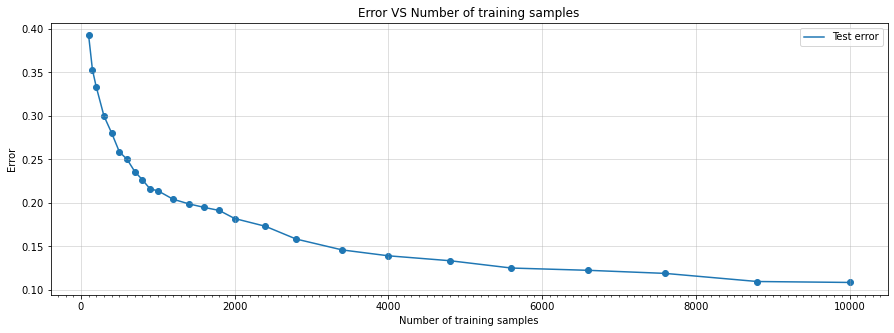

In [23]:
from matplotlib.ticker import MultipleLocator

training_err_plot = []
test_err_plot = []

m_plot = [100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2400, 2800, 3400, 4000, 4800, 5600, 6600, 7600, 8800, 10000]

for m in m_plot:
        
    X_train, X_test = X[:m], X[m:]
    y_train, y_test = y[:m], y[m:]
    
    mlp_tmp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=best_lr, 
                    hidden_layer_sizes=best_NNarchitecture, 
                    batch_size=best_batchsize)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        mlp_tmp.fit(X_train, y_train)
    
    #get training and test error for the NN
    training_err_plot.append(1 - mlp_tmp.score(X_train, y_train))
    test_err_plot.append(1 - mlp_tmp.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(15, 5))
# ax.scatter(m_plot, training_err_plot, label='Training error')
ax.scatter(m_plot, test_err_plot)
ax.plot(m_plot, test_err_plot, label='Test error')
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Error')
ax.set_title('Error VS Number of training samples')
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.grid(alpha=0.5)
ax.legend();


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

## TO DO 7 (done)

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


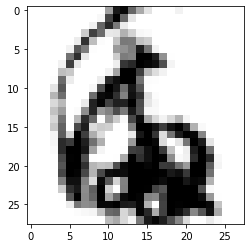

LABEL: 6, ま

NN (wrong) prediction with m=600 training data points: な
NN (correct) prediction with m=4000 training data points: ま


In [18]:
for sample, label, i in zip(X, y, range(X.shape[0])):
    if mlp_best.predict(sample.reshape(1, -1)) != label and mlp_moredata.predict(sample.reshape(1, -1)) == label:
            NN_prediction = mlp_best.predict(sample.reshape(1, -1))[0]
            large_NN_prediction = label
            x_missclassified = sample
            index = i
            break

plot_input(X, y, index)

print('\nNN (wrong) prediction with m=600 training data points:', kuzushiji_symbols[NN_prediction])
print('NN (correct) prediction with m=4000 training data points:', kuzushiji_symbols[large_NN_prediction])
        

## TO DO 8 (da capire cosa viene fatto e cosa viene rappresentato)

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


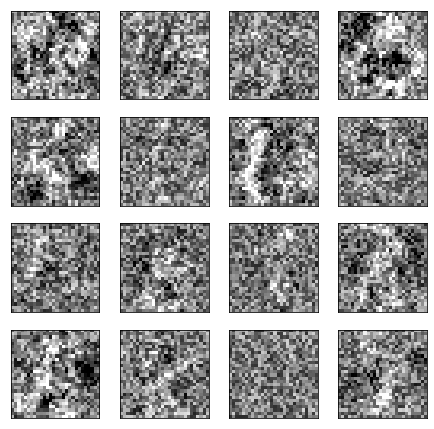

Weights with 4000 data points:


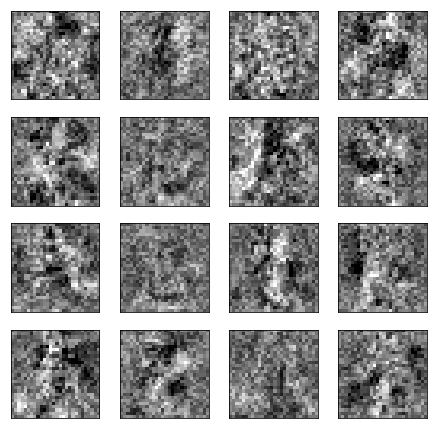

In [19]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4, figsize=(7.5, 7.5))
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4, figsize=(7.5, 7.5))
vmin, vmax = mlp_moredata.coefs_[0].min(), mlp_moredata.coefs_[0].max()

# ? here there was an error in the original code?
for coef, ax in zip(mlp_moredata.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

## TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [20]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

#ADD YOUR CODE

print ('RESULTS FOR SVM')

SVM_training_error =  #ADD YOUR CODE

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = #ADD YOUR CODE
print("Test score SVM:")
print(SVM_test_error)

SyntaxError: invalid syntax (Temp/ipykernel_21388/338159143.py, line 12)

In [ ]:
from sklearn import linear_model

regL2 = #ADD YOUR CODE

# you can re-use your code from Lab 2

#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  #ADD YOUR CODE
test_error =  #ADD YOUR CODE

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)

## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]